# ニューラルネットワーク

## パーセプトロンからニューラルネットワークへ

ニューラルネットワークの図

<img src="img/3-1.gif" alt="ニューラルネットワークの例" title="ニューラルネットワークの例" width="300" height="300" />  

* 入力層
    * 左の列
    * ここでは第0層とする
* 中間層
    * 中間の列
    * ここでは第1層とする
    * 隠れ層とも呼ばれる
        * 入力層や出力層とちがって、人の目には見えない層だから
* 出力層
    * 一番右の列
    * ここでは第2層とする

---

パーセプトロンの式

$
y = 
\begin{eqnarray}
\left\{
\begin{array}{l}
0 & ( b + \omega_{1} x_{1} + \omega_{2} x_{2} \leqq 0 ) \\
1 & ( b + \omega_{1} x_{1} + \omega_{2} x_{2} > 0 ) 
\end{array}
\right.
\end{eqnarray}
$

でバイアスを明示的に図示すると以下
   
<img src="img/3-3.png" alt="バイアスを明示的に示す" title="バイアスを明示的に示す" width="300" height="300" />  

* 重みが $ b $ で入力が1の信号が追加されている
    * **バイアスの信号は常に1**であるため、図で表す際にはニューロンを灰色で塗りつぶして他のニューロンと差別化する

式をよりシンプルな形に書き換える

$
y = h ( b + \omega_{1} x_{1} + \omega_{2} x_{2} )  \\
h(x) = 
\begin{eqnarray}
\left\{
\begin{array}{l}
0 & ( x \leqq 0 ) \\
1 & ( x > 0 ) 
\end{array}
\right.
\end{eqnarray}
$

* 場合分け(0を超えたら1を出力、そうでなければ0を出力)を一つの関数 $ h(x) $ で表現
    * これを**活性化関数(activation function)**という
        * 入力信号の総和を出力信号に変換する関数

さらに式を置き換えると

$
a = b + \omega_{1} x_{1} + \omega_{2} x_{2} \\
y = h(a)
$

* a : 重み付き入力信号とバイアスの総和

これを図示すると以下になる

（ここに図を入れる）

* ニューロンの○の中に活性化関数によるプロセスを明示的に図示
    * 重み付き信号の和の結果が $ a $ というノードになる
    * 活性化関数 $ h() $ によって $ y $ というノードに変換される
        * ここでは「ニューロン」と「ノード」という用語は同じ意味で使う

---

* パーセプトロンとニューラルネットワークの違い
    * ニューロンのつながり方はパーセプトロンと同じ
    * 「単純パーセプトロン」のモデル
        * 単層のネットワーク
        * 活性化関数がステップ関数(階段関数)
    * 「多層パーセプトロン」のモデル
        * 多層のネットワーク
        * 活性化関数がステップ関数
    * 「ニューラルネットワーク」のモデル
        * 多層ネットワーク
        * 活性化関数がシグモイド関数など**滑らかな活性化関数を使用**
    


## 活性化関数

### ステップ関数

$
h(x) = 
\begin{eqnarray}
\left\{
\begin{array}{l}
0 & ( x \leqq 0 ) \\
1 & ( x > 0 ) 
\end{array}
\right.
\end{eqnarray}
$

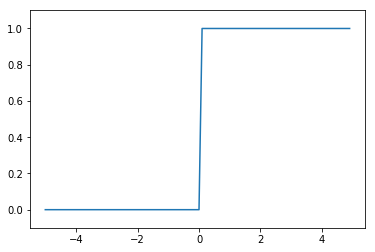

In [11]:
import matplotlib.pyplot as plt
import numpy  as np
%matplotlib inline

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数 (sigmoid function)

$
h (x) = \frac{1}{1 + e^{-x}}
$